<a href="https://colab.research.google.com/github/Bevincent-Edward/ML-Projects/blob/main/WineQualityPrediction21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction

**IMPORTING PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wd=pd.read_csv('/content/winequality-red.csv')

In [ ]:
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wd.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
print("The number of coloumns:",wd.shape[0])
print("The number of rows:",wd.shape[1])

The number of coloumns: 1599
The number of rows: 12


In [ ]:
wd.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no Null Values in this dataset

In [ ]:
wd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Bivaraiate Analysis**

In [ ]:
wd.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

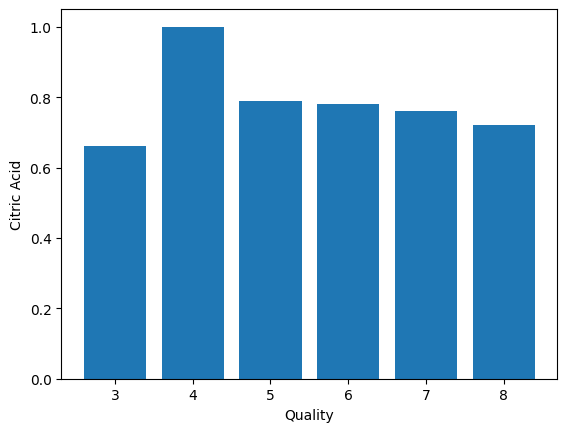

In [ ]:
plt.bar(wd['quality'],wd['citric acid'])
plt.xlabel("Quality")
plt.ylabel("Citric Acid")
plt.show()

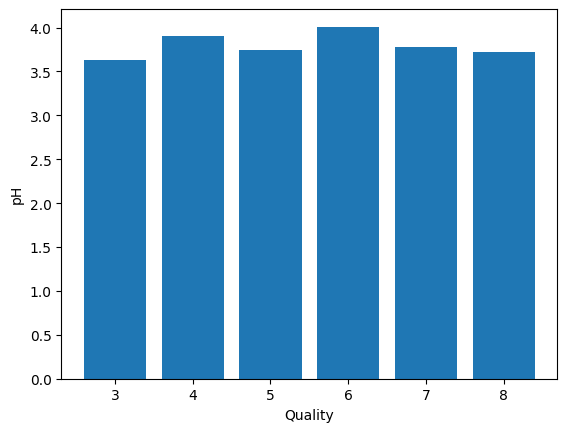

In [ ]:
plt.bar(wd['quality'],wd['pH'])
plt.xlabel("Quality")
plt.ylabel("pH")
plt.show()

**Correlation Matrix**

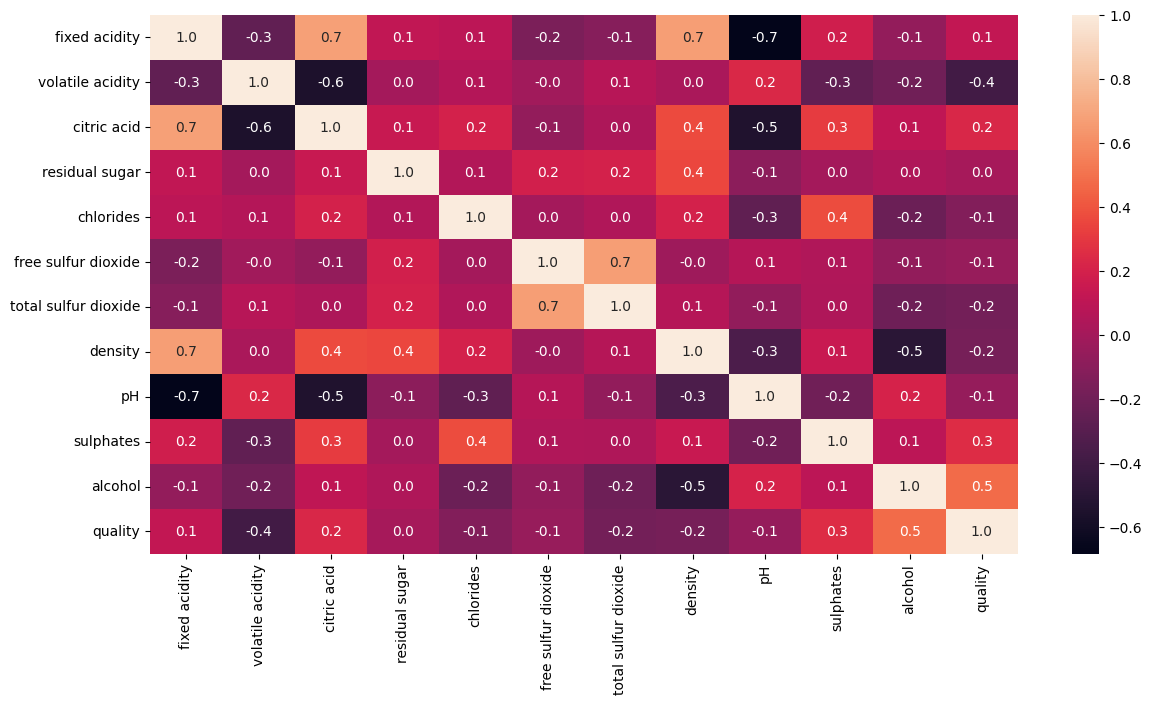

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(wd.corr(),annot=True,fmt='0.1f')#annot and fmt are parameters of seaborn to display the value and fmt to limit the decimal val
plt.show()

**Binarization of Target Variable:**

To frame a range for the target variable

In [ ]:
wd['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
wd['quality']=[1 if x>=7 else 0 for x in wd['quality']]

In [ ]:
wd['quality'].unique()

array([0, 1])

**Feature Matrix and Response Variable:**

X stores the feature matrix and Y has the target variable which is the response varaible

In [ ]:
x=wd.drop('quality',axis=1)
y=wd['quality']

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

**Data Balancing**

In [ ]:
wd['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

There is an unbalance in dataset so Balancing is done

In [ ]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

**Data Splitting for Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)  # 20% data for testing purpose

**Feature Scaling:**

To Normalize the range of values in the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stan=StandardScaler()
x_train=stan.fit_transform(x_train)
x_test=stan.transform(x_test)


In [ ]:
x_train

array([[-0.53714242, -1.12449837,  0.25436573, ...,  1.20338037,
         0.46481335,  0.96094517],
       [ 0.58813676, -0.82164534,  1.04331974, ...,  0.37826987,
         0.40673169,  1.35740188],
       [ 0.71841527,  2.43424734, -0.34344837, ...,  0.72814216,
        -0.18193519,  0.25218731],
       ...,
       [ 0.32410755,  0.75763206, -1.63497387, ..., -0.83245694,
        -0.43691863, -0.44380427],
       [-0.18285952,  0.96720897, -1.11836367, ..., -0.08608346,
         0.3280317 , -0.00880953],
       [-0.74615626,  0.87739029, -1.32500775, ...,  1.4066635 ,
        -1.01063137, -1.22679479]])

**Principle Component Analysis(PCA):**

To reduce the dimensionality of the data but keeping the important data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=0.90)  #90 percent of the data is retained

In [ ]:
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [ ]:
pca.explained_variance_ratio_

array([0.29392887, 0.18694976, 0.14241894, 0.10497529, 0.08598404,
       0.05782298, 0.04698699])

As our dataset contains 11 columns,the data returned in PCA has 7 components. It means that the 7 components returns 90% of the data which is shown below by suming the datas

In [ ]:
sum(pca.explained_variance_ratio_)

0.919066876762003

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)  #fiting the data by logistic regression algorithm

LogisticRegression()

In [ ]:
ypred=log.predict(x_test)   #after the data is trained as logistic regression,now to predict a variable is created and x_test is predicted

In [ ]:
from sklearn.metrics import accuracy_score
print("the Accuracy Score is:",accuracy_score(y_test,ypred))  #actual values are in y_test and predicted values are in y_pred

the Accuracy Score is: 0.8119349005424955


In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [ ]:
precision_score(y_test,ypred)

0.7743055555555556

In [ ]:
f1_score(y_test,ypred)

0.8109090909090909

In [ ]:
recall_score(y_test,ypred)

0.851145038167939

**Support Vector Classification(SVC)**

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
ypred2=svm.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,ypred2))
print("Precison accuracy:",precision_score(y_test,ypred2))
print("f1 accuracy:",f1_score(y_test,ypred2))
print("Recall Accuracy:",recall_score(y_test,ypred2))

Accuracy score: 0.8698010849909584
Precison accuracy: 0.8209459459459459
f1 accuracy: 0.870967741935484
Recall Accuracy: 0.9274809160305344


**KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
ypred3=knn.predict(x_test)

In [ ]:
print("Accuracy score:",accuracy_score(y_test,ypred3))
print("Precison accuracy:",precision_score(y_test,ypred3))
print("f1 accuracy:",f1_score(y_test,ypred3))
print("Recall Accuracy:",recall_score(y_test,ypred3))

Accuracy score: 0.8770343580470162
Precison accuracy: 0.803125
f1 accuracy: 0.8831615120274913
Recall Accuracy: 0.9809160305343512


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred4=dt.predict(x_test)

In [ ]:
print("Accuracy score:",accuracy_score(y_test,ypred4))
print("Precison accuracy:",precision_score(y_test,ypred4))
print("f1 accuracy:",f1_score(y_test,ypred4))
print("Recall Accuracy:",recall_score(y_test,ypred4))

Accuracy score: 0.8679927667269439
Precison accuracy: 0.8387096774193549
f1 accuracy: 0.8650646950092421
Recall Accuracy: 0.8931297709923665


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
ypred5=rf.predict(x_test)

In [ ]:
print("Accuracy score:",accuracy_score(y_test,ypred5))
print("Precison accuracy:",precision_score(y_test,ypred5))
print("f1 accuracy:",f1_score(y_test,ypred5))
print("Recall Accuracy:",recall_score(y_test,ypred5))

Accuracy score: 0.9150090415913201
Precison accuracy: 0.8798586572438163
f1 accuracy: 0.9137614678899082
Recall Accuracy: 0.950381679389313


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier()

In [ ]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
ypred6=gb.predict(x_test)

In [ ]:
print("Accuracy score:",accuracy_score(y_test,ypred6))
print("Precison accuracy:",precision_score(y_test,ypred6))
print("f1 accuracy:",f1_score(y_test,ypred6))
print("Recall Accuracy:",recall_score(y_test,ypred6))

Accuracy score: 0.8860759493670886
Precison accuracy: 0.8466898954703833
f1 accuracy: 0.8852459016393442
Recall Accuracy: 0.9274809160305344


**Now,All the models accuracy are displayed below!**

In [ ]:
final_data = pd.DataFrame({'Models':['LogisticRegression','SVC','KNN','DecisonTree','RandomForest','GradientBoostingClassifier'],
             'ACC':[accuracy_score(y_test,ypred)*100,
                   accuracy_score(y_test,ypred2)*100,
                   accuracy_score(y_test,ypred3)*100,
                   accuracy_score(y_test,ypred4)*100,
                   accuracy_score(y_test,ypred5)*100,
                   accuracy_score(y_test,ypred6)*100]})

In [ ]:
final_data

,Models,ACC
0,LogisticRegression,81.193490
1,SVC,86.980108
2,KNN,87.703436
3,DecisonTree,86.799277
4,RandomForest,91.500904
5,GradientBoostingClassifier,88.607595


Random Forest Model produces the highest Accuracy and it is also represented in the barplot below!

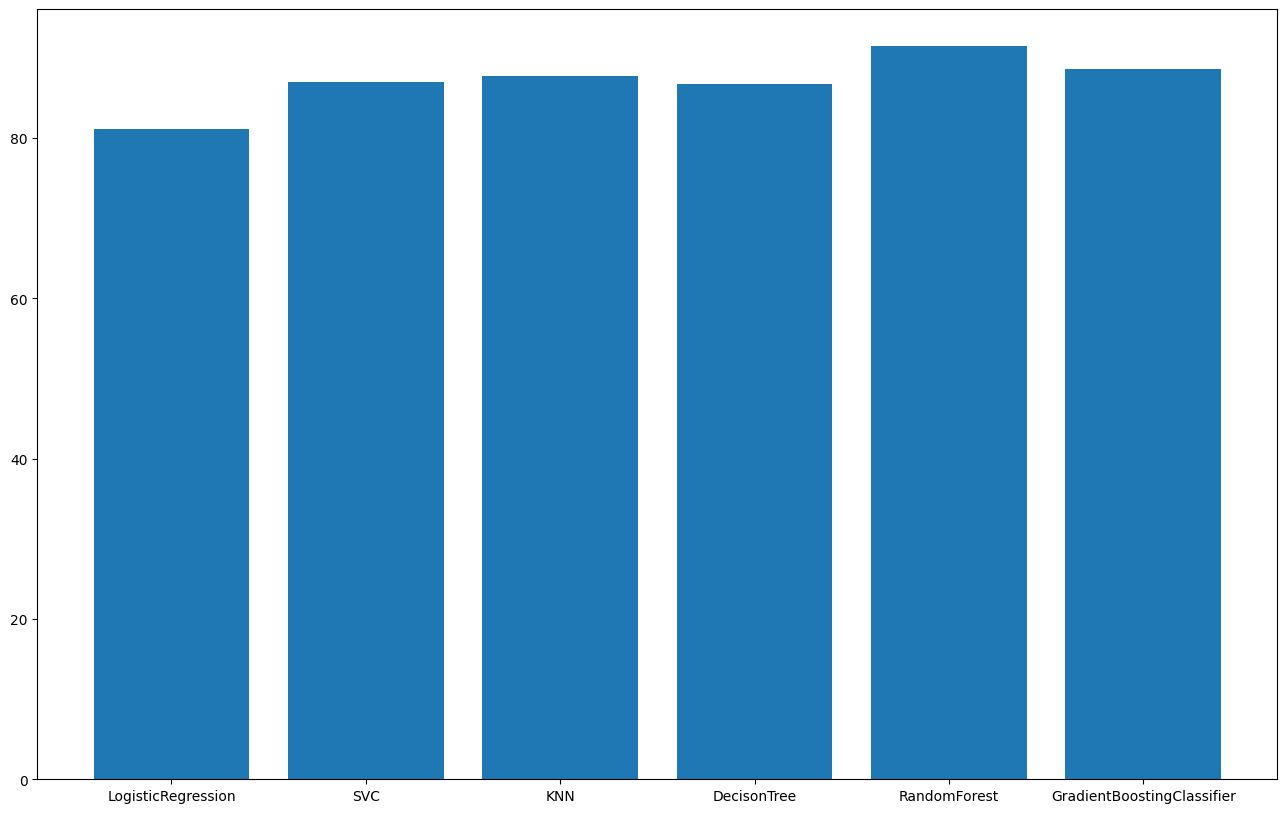

In [ ]:
plt.figure(figsize=[16,10])
plt.bar(final_data['Models'],final_data['ACC'])
plt.show()


**Saving the Model**

In [ ]:
x= wd.drop('quality',axis=1)
y= wd['quality']

In [ ]:
from imblearn.over_sampling import SMOTE
x_res,y_res = SMOTE().fit_resample(x,y)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x_res)

In [ ]:
x= pca.fit_transform(x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'WineQualityPrediction')

['WineQualityPrediction']

In [ ]:
model= joblib.load('WineQualityPrediction')

**Now ,Prediction on New Data which is created above!**

In [ ]:
nd=pd.DataFrame({
    'fixed acidity':8.3,
    'volatile acidity':7.3,
    'citric acid':0.12,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,

},index=[0])

In [ ]:
nd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.3,7.3,0.12,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [ ]:
test = pca.transform(st.transform(nd))

In [ ]:
p = model.predict(test)

In [ ]:
p

array([0])

As the index value of the p denotes the quality, it is shown as the quality itself by 'if' conditon below!

In [ ]:
if p[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine
